### 크롤링
- 웹 페이지를 그대로 가져와서 가져온 페이지에서 데이터를 추출해 내는 행위

### Request 사용법

In [2]:
# 서버에 페이지 정보를 요청할 때 사용하는 라이브러리
import requests as req

In [3]:
url = 'https://www.naver.com/'
res = req.get(url)
res
# <Response [200]> : 응답에 성공했다는 의미

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
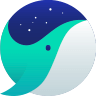
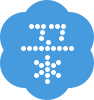

In [4]:
#html 코드 정보 보기
res.text

### BeautifulSoup 사용하기
- 가져온 html 코드에서 내가 원하는 내용만 추출할때 사용

In [5]:
from bs4 import BeautifulSoup as bs

In [6]:
# 파싱 bs(파싱할 데이터, 파싱방법)
# lxml == html.parser
soup = bs(res.text, 'lxml')

In [7]:
soup.select_one('a.nav')

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [8]:
soup.select('a.nav')[2].text

'블로그'

### 광주날씨 크롤링

In [9]:
url='https://search.naver.com/search.naver?where=nexearch&sm=top_sug.asiw&fbm=1&acr=1&acq=%EA%B3%A0%E3%85%93%E3%85%8F%E3%85%87%EC%A3%BC&qdt=0&ie=utf8&acir=1&query=%EA%B4%91%EC%A3%BC+%EB%82%A0%EC%94%A8'
res=req.get(url)

In [10]:
soup = bs(res.text)

In [11]:
soup.select('div.temperature_text > strong')[0].text

'현재 온도-2°'

### 멜론차트 수집

In [12]:
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36

SyntaxError: illegal target for annotation (Temp/ipykernel_11332/1275540322.py, line 1)

In [14]:
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

In [15]:
url = 'https://www.melon.com/chart/index.htm'
res = req.get(url, headers = h)
res # <Response [406[> : 응답 실패


<Response [200]>

In [16]:
melon = bs(res.text)

In [17]:
singer=melon.select('div.ellipsis.rank02 > a:nth-child(1)')
len(singer)

100

In [18]:
title=melon.select('div.ellipsis.rank01>span>a')
for i in range(0,100,1):
    print(f'{i+1}',title[i].text + ' - ' + singer[i].text,'\t')
    

1 사랑은 늘 도망가 - 임영웅 	
2 Counting Stars (Feat. Beenzino) - BE'O (비오) 	
3 회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) - sokodomo 	
4 리무진 (Feat. MINO) (Prod. GRAY) - BE'O (비오) 	
5 ELEVEN - IVE (아이브) 	
6 겨울잠 - 아이유 	
7 취중고백 - 김민석 (멜로망스) 	
8 만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) - 베이식 (Basick) 	
9 Dreams Come True - aespa 	
10 눈이 오잖아(Feat.헤이즈) - 이무진 	
11 드라마 - 아이유 	
12 다정히 내 이름을 부르면 - 경서예지 	
13 strawberry moon - 아이유 	
14 이제 나만 믿어요 - 임영웅 	
15 Savage - aespa 	
16 불협화음 (Feat. AKMU) (Prod. GRAY) - Mudd the student 	
17 신호등 - 이무진 	
18 흰눈 - 먼데이 키즈 (Monday Kiz) 	
19 STAY - The Kid LAROI 	
20 Next Level - aespa 	
21 그대라는 사치 - 임영웅 	
22 Step Back - GOT the beat 	
23 네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY) - BE'O (비오) 	
24 별빛 같은 나의 사랑아 - 임영웅 	
25 다시 사랑한다면 (김필 Ver.) - 임영웅 	
26 쉬어 (Feat. MINO) (Prod. GRAY) - 아넌딜라이트(Anandelight) 	
27 잊었니 - 임영웅 	
28 HERO - 임영웅 	
29 정거장 - 아이유 	
30 너를 생각해 - 주시크 (Joosiq) 	
31 Wake Up (Prod. 코드 쿤스트) - 개코 	
32 끝사랑 - 임영웅 	
33 Christmas Tree - V 	
34 Bk Love - 임영웅 	
35 문득 - BE'

In [19]:
title_list=[]
singer_list=[]
rank_list=[]
for i in range(len(title)):
    title_list.append(title[i].text)
    singer_list.append(singer[i].text)
    rank_list.append(i+1)


In [20]:
import pandas as pd

In [21]:
dic = { '노래제목' : title_list, '가수' : singer_list,'순위': rank_list}
dic

{'노래제목': ['사랑은 늘 도망가',
  'Counting Stars (Feat. Beenzino)',
  '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)',
  '리무진 (Feat. MINO) (Prod. GRAY)',
  'ELEVEN',
  '겨울잠',
  '취중고백',
  '만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)',
  'Dreams Come True',
  '눈이 오잖아(Feat.헤이즈)',
  '드라마',
  '다정히 내 이름을 부르면',
  'strawberry moon',
  '이제 나만 믿어요',
  'Savage',
  '불협화음 (Feat. AKMU) (Prod. GRAY)',
  '신호등',
  '흰눈',
  'STAY',
  'Next Level',
  '그대라는 사치',
  'Step Back',
  '네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)',
  '별빛 같은 나의 사랑아',
  '다시 사랑한다면 (김필 Ver.)',
  '쉬어 (Feat. MINO) (Prod. GRAY)',
  '잊었니',
  'HERO',
  '정거장',
  '너를 생각해',
  'Wake Up (Prod. 코드 쿤스트)',
  '끝사랑',
  'Christmas Tree',
  'Bk Love',
  '문득',
  'OHAYO MY NIGHT',
  'Butter',
  'Permission to Dance',
  'My Universe',
  '우리가 헤어져야 했던 이유',
  '러브레터',
  'Dynamite',
  '바라만 본다',
  '낙하 (with 아이유)',
  '계단말고 엘리베이터',
  '그게 더 편할 것 같아 (N번째 연애 X 멜로망스)',
  '너',
  'Celebrity',
  'Still I Love You',
  '서랍',
  '헤픈 우연',
  'Weekend',
  '안녕 우린 헤어져야만 해',
  '라일락',
  '이별후회',

In [22]:
df = pd.DataFrame(dic)
df.style.set_properties(**{'text-align':'left'})

,노래제목,가수,순위
0,사랑은 늘 도망가,임영웅,1
1,Counting Stars (Feat. Beenzino),BE'O (비오),2
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,3
3,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),4
4,ELEVEN,IVE (아이브),5
5,겨울잠,아이유,6
6,취중고백,김민석 (멜로망스),7
7,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),8
8,Dreams Come True,aespa,9
9,눈이 오잖아(Feat.헤이즈),이무진,10


In [23]:
df.set_index('순위',inplace=True)

In [24]:
df

,노래제목,가수
순위,,
1,사랑은 늘 도망가,임영웅
2,Counting Stars (Feat. Beenzino),BE'O (비오)
3,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
4,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
5,ELEVEN,IVE (아이브)
...,...,...
96,ASAP,STAYC(스테이씨)
97,너와 나의 Memories,염따
98,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
